<a href="https://colab.research.google.com/github/jiahuili1995/ELEC4630-computer-vision/blob/main/Ass4Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install dlib

install dlib.

In [5]:
# First store some sample images in the folder 'images'
!mkdir -p images
!cd images; wget -nc https://raw.githubusercontent.com/jiahuili1995/ELEC4630-computer-vision/images/image_0001.jpg
!cd images; wget -nc https://raw.githubusercontent.com/jiahuili1995/ELEC4630-computer-vision/images/image_0102.jpg
!cd images; wget -nc https://raw.githubusercontent.com/jiahuili1995/ELEC4630-computer-vision/images/image_0302.jpg
!cd images; wget -nc https://raw.githubusercontent.com/jiahuili1995/ELEC4630-computer-vision/images/image_0402.jpg
!cd images; wget -nc https://raw.githubusercontent.com/jiahuili1995/ELEC4630-computer-vision/images/image_0016.jpg

--2021-05-19 15:51:14--  https://raw.githubusercontent.com/jiahuili1995/ELEC4630-computer-vision/images/image_0001.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 176034 (172K) [image/jpeg]
Saving to: ‘image_0001.jpg’

image_0001.jpg      100%[===================>] 171.91K  --.-KB/s    in 0.003s  

2021-05-19 15:51:14 (52.7 MB/s) - ‘image_0001.jpg’ saved [176034/176034]

--2021-05-19 15:51:14--  https://raw.githubusercontent.com/jiahuili1995/ELEC4630-computer-vision/images/image_0102.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK

creat a image folder, input testing and validation images.

In [3]:
!pip3 install face_recognition

     |████████████████████████████████| 100.2MB 96kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=2dda3800ca68130f789f4fdcafecf5ea824359d479a9c4790bf01fc430806df5
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


install face recognition model.

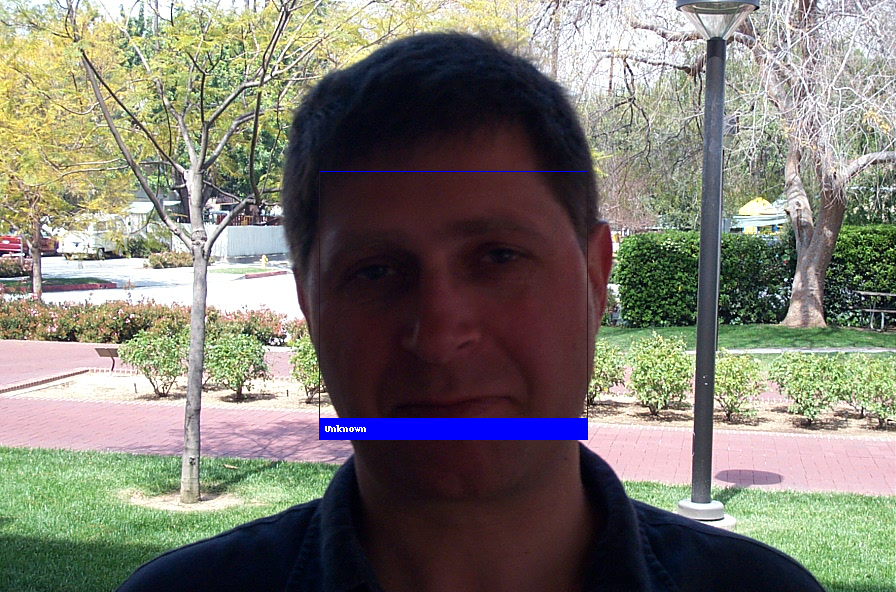

image_0016.jpg


In [9]:
import face_recognition
from PIL import Image, ImageDraw
import numpy as np

# the following code are based on Dlib_Exercise.ipynb from lovellbrian, website:
# https://github.com/lovellbrian/ELEC4630/blob/master/Dlib_Exercise.ipynb 
# This is an example of running face recognition on a single image
# and drawing a box to locate face.

# Load a target picture and learn how to recognize it.
first_image = face_recognition.load_image_file("images/image_0001.jpg")
first_face_encoding = face_recognition.face_encodings(first_image)[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
    first_face_encoding
]
known_face_names = [
    "the image_0001 person from database"
]

# Load unknown faces, manually change the testing image.
unknown_image1 = face_recognition.load_image_file("images/image_0102.jpg")
unknown_image = face_recognition.load_image_file("images/image_0016.jpg")
unknown_image2 = face_recognition.load_image_file("images/image_0302.jpg")
unknown_image4 = face_recognition.load_image_file("images/image_0402.jpg")
# Find face position and face encoding in the unknown image
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
# See http://pillow.readthedocs.io/ for more about PIL/Pillow
pill_image = Image.fromarray(unknown_image)

# Create a Pillow ImageDraw Draw instance to draw with
draw = ImageDraw.Draw(pill_image)

# Loop through each face found in the unknown image
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # whether face matching for the known face
    #matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
    #matches = face_recognition.compare_faces(known_face_encodings, face_encoding,tolerance =0.8)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding,tolerance =0.2) 
    name = "Unknown"
    #using the known face with the smallest distance to the new face
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    # Draw a label with a name below the face
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))

# Remove the drawing library from memory as per the Pillow docs
del draw

# Display the resulting image
display(pill_image)

#manually change the print content.
print("image_0016.jpg")
